In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams["figure.figsize"] = (24,18)
plt.rcParams.update({'font.size': 32})

# **Linearity**

**A linear function is a function whose graph lies on a straight line and which can be described by giving the slope and y intercept of that line.**

**For our example, we have the following linear function: $y = 2(x) + 4$**

<sup>Source: [Linearity](https://math.mit.edu/~djk/calculus_beginners/chapter03/section03.html) from Calculus for Beginners and Artists by Daniel Kleitman</sup>

## **Polynomial**

**A polynomial is a mathematical expression involving a sum of powers in one or more variables multiplied by coefficients.**

<sup>Source: [Polynomial](https://mathworld.wolfram.com/Polynomial.html) by Eric W. Weisstein from Wolfram MathWorld</sup>

In [ ]:
def linear_func(x):
  return 2*x+4

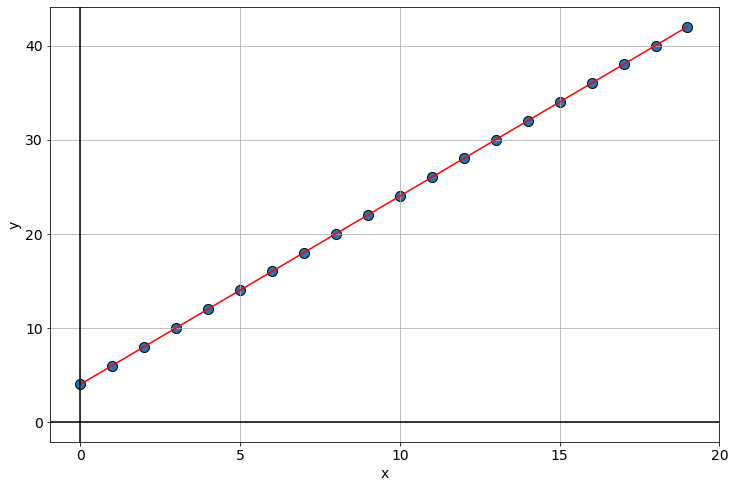

In [ ]:
plt.scatter([x for x in range(0,20)], [linear_func(x) for x in range(0,20)], s = 100, edgecolors='black')
plt.plot([x for x in range(0,20)], [linear_func(x) for x in range(0,20)], color='red')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xticks(range(0,25,5))
plt.xlabel('x')
plt.ylabel('y')
plt.grid();

$\Large{\text{Slope = } \frac{y_i - y_{i-1}}{x_i - x_{i-1}}}$

In [ ]:
pd.DataFrame({'y Value':[linear_func(x) for x in range(0,20)],
              'Slope': [linear_func(x) - linear_func(x_prev)  for x,x_prev in zip(range(0,20),range(-1,19))]}).rename_axis('x Value')

,y Value,Slope
x Value,,
0,4,2
1,6,2
2,8,2
3,10,2
4,12,2
5,14,2
6,16,2
7,18,2
8,20,2


# **Non-linear function**

**A non-linear function is a polynomial that contains a degree higher than one. A non-linear function's output is not a straight line.**

**In the case of the Bitcoin process we are modeling, we have a quadratic function (which is a non-linear function).  A quadratic function is a second-order polynomial function in a single variable $x$.**

$\large{\text{Cost of Mining Bitcoin = (2)(Number of Mining hours)$^2$ + (25)(Number of Mining hours) + $\epsilon$}}$

$\large{= 2x^2 + 25x + \epsilon}$

<sup>Source: [Quadratic Equation](https://mathworld.wolfram.com/QuadraticEquation.html) by Eric W. Weisstein from Wolfram MathWorld</sup>

In [ ]:
def nl_func(x):
  return 2*x**2 + 25*x + np.random.normal(loc=0,scale=15)

In [ ]:
x = np.arange(0,25)

np.random.seed(9)
poly_sample = [nl_func(x) for x in x]

for hour,cost in zip(x,poly_sample):
  print(f'For {hour} hour(s) the observed cost of mining for Bitcoin is {cost:.2f}.')

For 0 hour(s) the observed cost of mining for Bitcoin is 0.02.
For 1 hour(s) the observed cost of mining for Bitcoin is 22.66.
For 2 hour(s) the observed cost of mining for Bitcoin is 41.26.
For 3 hour(s) the observed cost of mining for Bitcoin is 92.81.
For 4 hour(s) the observed cost of mining for Bitcoin is 126.32.
For 5 hour(s) the observed cost of mining for Bitcoin is 167.78.
For 6 hour(s) the observed cost of mining for Bitcoin is 199.24.
For 7 hour(s) the observed cost of mining for Bitcoin is 265.64.
For 8 hour(s) the observed cost of mining for Bitcoin is 324.39.
For 9 hour(s) the observed cost of mining for Bitcoin is 377.28.
For 10 hour(s) the observed cost of mining for Bitcoin is 459.54.
For 11 hour(s) the observed cost of mining for Bitcoin is 543.10.
For 12 hour(s) the observed cost of mining for Bitcoin is 592.45.
For 13 hour(s) the observed cost of mining for Bitcoin is 673.61.
For 14 hour(s) the observed cost of mining for Bitcoin is 769.34.
For 15 hour(s) the observ

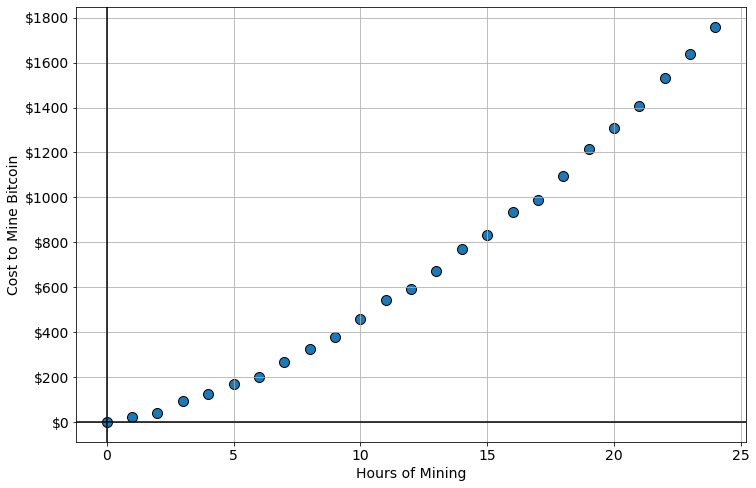

In [ ]:
plt.scatter(x, poly_sample,s = 100, edgecolors='black')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
cost_label = ['$' + str(cost) for cost in range(0,2000,200)]
plt.yticks(range(0,2000,200), cost_label)
plt.grid();

# **Simple Linear Regression**

**A simple linear regression models the relationship between an independent variable (in our example hours of mining) and the dependent variable (cost to mine Bitcoin).**

$\large{y_{predicted} = \beta_0 + \beta_1x_i} + ϵ$

$\text{Where: $y_{predicted}$ is the predicted value, $x_i$ is the input value, $\beta_0$ is the intercept and ϵ is the error term.}$

**$[\beta_0,\beta_1] = (X^{\text{T}}X)^{-1}X^{\text{T}}Y$**

$Y_{predicted} =  X^{\text{T}}\beta_1 + \beta_0$

In [ ]:
def lin_fit(x_vals,y):
  #convert x,y to numpy arrays in case they were input as lists
  x_vals = np.array(x_vals)
  y = np.array(y)
  x_array = np.concatenate((np.ones(x_vals.shape),x_vals)).reshape(2,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  #returns the intercept and slope for the linear regression
  return np.dot(x_inv,x_dot_y)

def lin_pred(x_vals,coefficients):
  return np.dot(coefficients[1], x_vals) + coefficients[0]

y_pred = lin_pred(x,lin_fit(x, poly_sample))

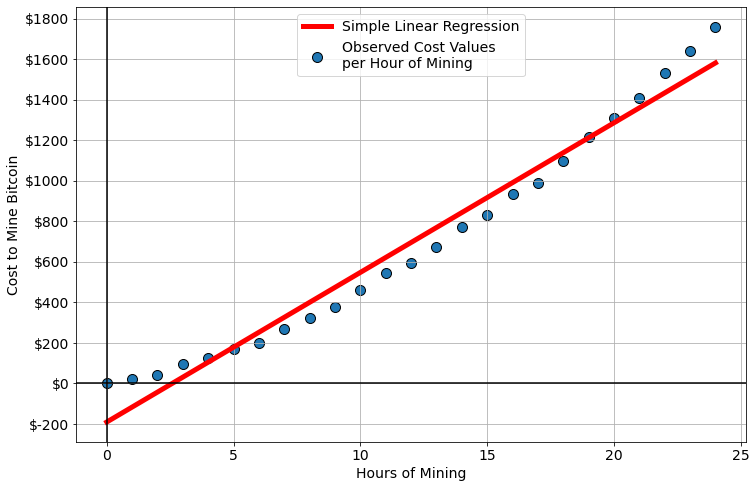

In [ ]:
plt.scatter(x, poly_sample,s = 100, edgecolors='black',label='Observed Cost Values\nper Hour of Mining')
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
plt.plot(y_pred, color='red',lw=5, label='Simple Linear Regression')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
cost_label = ['$' + str(cost) for cost in range(-200,2000,200)]
plt.yticks(range(-200,2000,200), cost_label)
plt.grid()
plt.legend();

In [ ]:
y_pred[2]

-43.566338835009844

# **Polynomial Regression**

**In the case where the data is non-linear, models such as Polynomial Regression can be considered. The model for the Bitcoin cost prediction:**

$\Large{Y_{Predicted = \beta_0 + \beta_1X+\beta_2 X^2}}$

**In the model, the highest degree ($h$) is two ($X^2$), making this a quadratic regression. There is still only one independent variable (hours of mining), but the model will multiply the independent variable by both $\beta_1X$ and $\beta_1X^2$, which transforms the independent variable by squaring it.**

**Even though Polynomial Regression is used to model non-linear processes, the technique is still a linear model because it is linear in the regression coefficients ($\beta_1, \beta_2$).**

<sup>[Polynomial Regression](https://online.stat.psu.edu/stat462/node/158/) from Penn State's Eberly College of Science</sup>

## **Matrix Form**

**$[\beta_0,\beta_1, \beta_2] = (X^{\text{T}}X)^{-1}X^{\text{T}}Y$**

$Y_{predicted} =  \beta_0 + X^{\text{T}}\beta_1 + (X^{\text{T}})^2\beta_2$

### **Expanded Form for the Slope and Intercept**

$Y = \begin{bmatrix}
  0.02 & 22.66 & \cdots & 1638.71 & 1759.75 
\end{bmatrix} \ \ \ \ X = \begin{bmatrix}
  1 & 1 & \cdots & 1 & 1 \\ 0 & 1 & \cdots & 23 & 24 \\  0 & 1 & \cdots & 529 & 576  
\end{bmatrix} \ \ \ \ X^{\text{T}} = \begin{bmatrix}
  1 & 0 & 0 \\ 1 & 1 & 1\\ \vdots & \vdots \\ 1 & 23 & 529 \\ 1 & 24 & 576 \\ 
\end{bmatrix}$

$X \cdot X^{\text{T}} = \begin{bmatrix} 1 & 1 & \cdots & 1 & 1 \\ 0 & 1 & \cdots & 23 & 24 \\  0 & 1 & \cdots & 529 & 576 \end{bmatrix} \begin{bmatrix}
  1 & 0 & 0 \\ 1 & 1 & 1\\ \vdots & \vdots & \vdots \\ 1 & 23 & 529 \\ 1 & 24 & 576 \\ 
\end{bmatrix} = \begin{bmatrix} 25 & 300 & 4900\\ 300 & 4900  & 90000\\  4900 & 90000 & 1763020\end{bmatrix}$

\\

$[X \cdot X^{\text{T}}]^{-1} = \begin{bmatrix} 0.308 & -0.050 & 0.001\\ -0.050 & 0.011 & -0.0004\\  0.002 & -4.459\text{e}-04 & 1.858\text{e}-05\end{bmatrix}$

\\

$Y \cdot X^{\text{T}} = \begin{bmatrix}
  0.02 & 22.66 & \cdots & 1638.71 & 1759.75 
\end{bmatrix} \cdot \begin{bmatrix}
  1 & 0 & 0 \\ 1 & 1 & 1\\ \vdots & \vdots \\ 1 & 23 & 529 \\ 1 & 24 & 576 \\ 
\end{bmatrix} = \begin{bmatrix}
  17371 & 304458 & 5813645 
\end{bmatrix}$

\\

$[\beta_0,\beta_1, \beta_2] = [X \cdot X^{\text{T}}]^{-1} \cdot Y \cdot X^{\text{T}} = \begin{bmatrix}
  -12.01567398 & 27.08595387 & 1.94824029 
\end{bmatrix}$

### **Expanded Form for the Cost to Mine Prediction**

$Y_{predicted} =  \beta_0 + X^{\text{T}}\beta_1 + (X^{\text{T}})^2\beta_2 = \begin{bmatrix}
   -11.01 &  27.09 & \cdots & 1642.58 & 1761.23 
\end{bmatrix}$

In [ ]:
def poly_reg_fit(x,y):
  x = np.array(x)
  y = np.array(y)
  x_array = np.concatenate((np.ones(x.shape),x,x**2)).reshape(3,-1)
  x_transpose = np.transpose(x_array)
  x_dot_x = np.dot(x_array,x_transpose)
  x_inv = np.linalg.inv(x_dot_x)
  x_dot_y = np.dot(y,x_transpose)
  intercept_beta = np.dot(x_inv,x_dot_y)
  return intercept_beta

def poly_pred(x, coefficients):
  return coefficients[0] + np.dot(coefficients[1], x) + np.dot(coefficients[2], x**2)

poly_reg_fit(x,poly_sample)

array([-12.01567398,  27.08595387,   1.94824029])

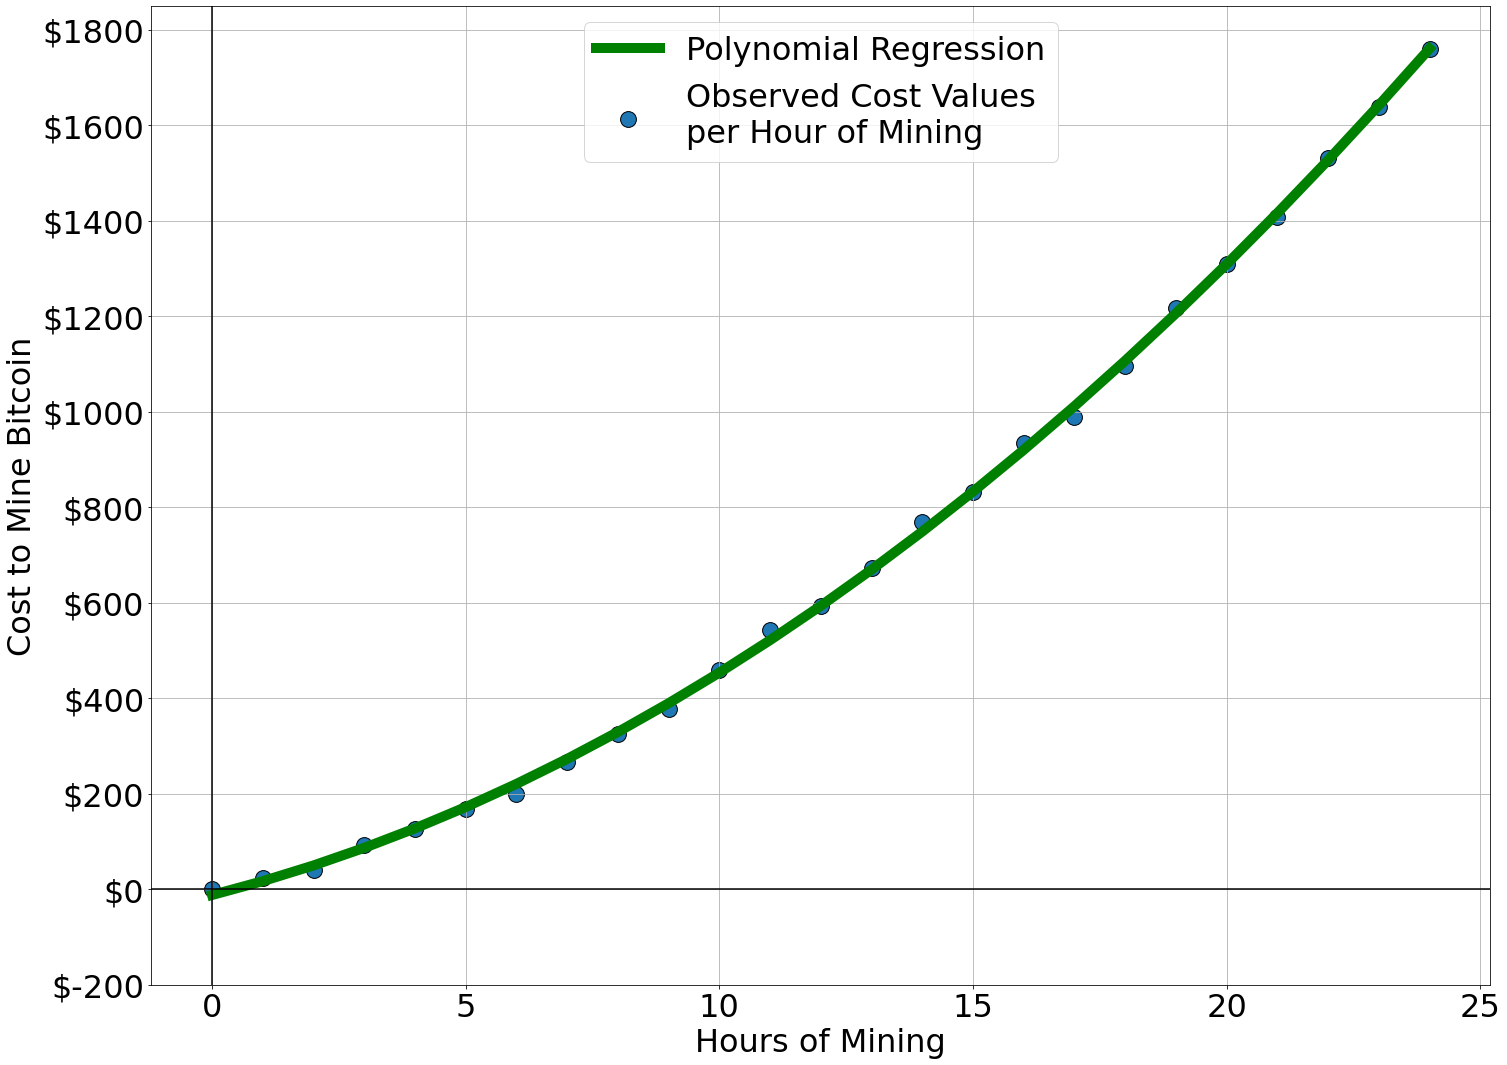

In [ ]:
y_poly_preds = poly_pred(x,poly_reg_fit(x,poly_sample))
plt.xlabel('Hours of Mining')
plt.ylabel('Cost to Mine Bitcoin')
plt.scatter(x, poly_sample,s = 250, edgecolors='black', label = 'Observed Cost Values\nper Hour of Mining')
plt.plot(y_poly_preds, color = 'green',lw=10,label='Polynomial Regression')
plt.axvline(color = 'black')
plt.axhline(color = 'black')
cost_label = ['$' + str(cost) for cost in range(-200,2000,200)]
plt.yticks(range(-200,2000,200), cost_label)
plt.grid()
plt.legend();

# **Comparing Mean Squared Errors**

**Mean squared error (MSE) is the sum of squared differences
between the predicted and true values. As the error rate increases, the MSE penalty grows quadratically, which heavily penalizes a model. A downside to MSE is if applied to a data set with a few outliers, it can heavily penalize a model.**

**MSE is one of the most popular tools to measure how accurate models are within statistics and machine learning.**

**Within Machine Learning, MSE is used as a loss function or part of a loss function that an algorithm minimizes.**

### $MSE = \displaystyle \frac{1}{N} \sum_{i=0}^N (y_i - \hat{y_i})^2 = \displaystyle \frac{1}{N} \sum_{i=0}^N (error_i)^2$

### $\text{Where: $N$=number of observed values, $y_i$ = observed target value, $\hat{y}=$ predicted}$

### $\text{target value.}$

In [ ]:
def mse(actual_y, predicted_y):
  return sum([(y_s - y_pred)**2 for y_s,y_pred in zip(actual_y, predicted_y)])*(1/len(actual_y))

In [ ]:
print(f'MSE Linear Regression: {mse(poly_sample,y_pred):.2f}\nMSE Polynomial Regression: {mse(poly_sample,y_poly_preds):.2f}')

MSE Linear Regression: 8289.97
MSE Polynomial Regression: 118.71


# **References and Additional Learning**

## **Articles**

- **[Explained: Linear and nonlinear systems](https://news.mit.edu/2010/explained-linear-0226) by Larry Hardesty from MIT News**

## **Websites**

- **[Calculus for Beginners and Artists](https://math.mit.edu/~djk/calculus_beginners/index.html) by Daniel Kleitman**

- **[Polynomial](https://mathworld.wolfram.com/Polynomial.html) by Eric W. Weisstein from Wolfram MathWorld**

- **[Polynomial Regression](https://online.stat.psu.edu/stat462/node/158/) from Penn State's Eberly College of Science**

- **[Polynomial Regression](https://www.sciencedirect.com/topics/mathematics/polynomial-regression) from Encyclopedia of Physical Science and Technology (Third Edition) by David L. Banks and Stephen E. Fienberg**

# **Connect**
- **Feel free to connect with Adrian on [YouTube](https://www.youtube.com/channel/UCPuDxI3xb_ryUUMfkm0jsRA), [LinkedIn](https://www.linkedin.com/in/adrian-dolinay-frm-96a289106/), [Twitter](https://twitter.com/DolinayG) and [GitHub](https://github.com/ad17171717). Happy coding!**